<table style="width:100%" border="0">
    <col width="20%">
    <col width="60%">
    <col width="20%">
    <tr></tr>
    <tr>
        <th style="text-align:left"><img src="Images/UNAM_logo.jpg" width="150px"></th>
        <th style="text-align:center"><span style="font-size:220%">Física Computacional</span><br/><br/><span style="font-size:150%">Tarea 14</span></th> 
        <th style="text-align:right"><img src="Images/LogoCiencias.jpg" width="170px"></th>
    </tr>
</table>

In [1]:
using PyPlot;

In [2]:
## Método RK4 independiente de la dimensión.

function RK_4(f,listt,x0)
     x = x0
     l = (listt[2]-listt[1])/2.0
     listx=[]
     push!(listx,x)
     for i in 2:length(listt)
        t = listt[i]
        k1 = f(x,t)
        k2 = f(x+l*k1,t+l)
        k3 = f(x+l*k2,t+l)
        k4 = f(x+2l*k3,t+2l)
        x += (l/3.0)*(k1+2k2+2k3+k4)
        push!(listx,x) 
     end
     return listx
end;

## Ejercicio 1

Se utiliza Runge-Kutta de orden 4 para encontrar las soluciones en el espacio fase del sistema:

$$\frac{d\mathbf{x}}{dt}=\boldsymbol{F}(\mathbf{x}),$$

con $\mathbf{x}(t)=(x(t),y(t))$ y $\boldsymbol{F}(\mathbf{x})=(y-y^{3},-x-y^{2})$

In [3]:
F(x,t)=[x[2]-x[2].^3,-x[1]-x[2].^2];

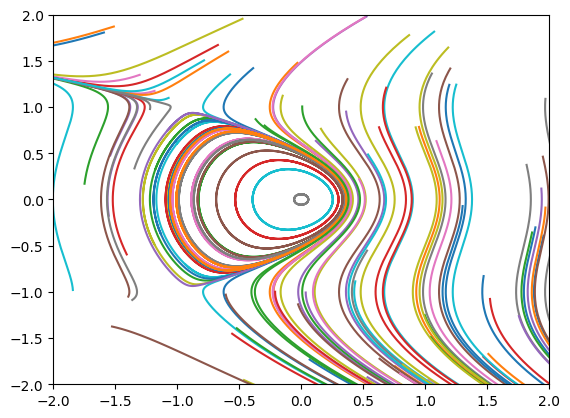

In [4]:
lista=0:0.01:20;                   # Paso h=0.01
for i in 1:100
    a=2*(2*rand(1)-1)              # Condición inicial x(0) aleatoria.
    b=2*(2*rand(1)-1)              # Condición inicial y(0) aleatoria.
    vector=RK_4(F,lista,[a,b]);
    lista_x1=map(x->x[1],vector);
    lista_x2=map(x->x[2],vector);
    plot(lista_x1,lista_x2)
    xlim([-2,2])                   # Límites de la gráfica para poder observar el comportamiento
    ylim([-2,2])                   # en los puntos fijos.
end

El jacobiano de $\boldsymbol{F}(\mathbf{x})$ está dado por:

$$J_{\boldsymbol{F}}(\mathbf{x})=\left(\begin{array}{cc}\dfrac{\partial F_{1}}{\partial x} & \dfrac{\partial F_{1}}{\partial y}\\\dfrac{\partial F_{2}}{\partial x} & \dfrac{\partial F_{2}}{\partial y}\end{array}\right)$$

como $\boldsymbol{F}(\mathbf{x})=(y-y^{3},-x-y^{2})$, entonces:

$$J_{\boldsymbol{F}}(\mathbf{x})=\left(\begin{array}{cc}0 & 1-3y^{2}\\-1 & -2y\end{array}\right)$$

así,

$$J_{\boldsymbol{F}}(0,0)=\left(\begin{array}{cc}0 & 1\\-1 & 0\end{array}\right)$$

Por lo tanto $\tau=\mathrm{tr}(J_{\boldsymbol{F}}(0,0))=0$ y $\Delta=\mathrm{det}(J_{\boldsymbol{F}}(0,0))=1$. Ergo el punto fijo es un centro.

## Ejercicio 2

Se analiza el oscilador de van der Pol, que está descrito por la ecuación diferencial:

$$\frac{d^{2}x}{dt^{2}}-\mu(1-x^{2})\frac{dx}{dt}+x=0$$

El cual con el mismo truco de hacer $u(t)=\dot{x}(t)$ se puede llevar al sistema

$$\frac{d\mathbf{x}}{dt}=\boldsymbol{P}(\mathbf{x}),$$

con $\mathbf{x}(t)=(x(t),u(t))$ y $\boldsymbol{P}(\mathbf{x})=(u,\mu(1-x^{2})u-x)$

In [5]:
P(x,t)=[x[2],0.5*(1-x[1].^2).*x[2]-x[1]];  # mu=0.5.

En el espacio fase:

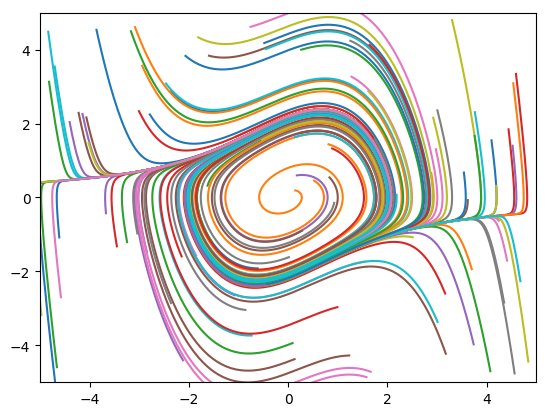

In [6]:
lista=0:0.01:20;      # Paso h=0.01
for i in 1:100
    CI3=5*(2*rand(1)-1)
    CI4=5*(2*rand(1)-1)
    vector=RK_4(P,lista,[CI3,CI4]);
    lista_x1=map(x->x[1],vector);
    lista_x2=map(x->x[2],vector);
    plot(lista_x1,lista_x2)
    xlim([-5,5])
    ylim([-5,5])
end

Se observa que cuando las soluciones comienzan dentro de cierta región, éstas comienzan a alejarse del origen y a acercarse a la frontera de esa región, mientras que si las soluciones comienzan fuera de esa región, también se acercan a esa frontera. A esta frontera se le conoce como _ciclo límite_. Se puede demostrar que el punto fijo $(0,0)$ es una espiral inestable. El jaconiano de $\boldsymbol{P}(\mathbf{x})$ es:

$$J_{\boldsymbol{P}}(\mathbf{x})=\left(\begin{array}{cc}\dfrac{\partial P_{1}}{\partial x} & \dfrac{\partial P_{1}}{\partial u}\\\dfrac{\partial P_{2}}{\partial x} & \dfrac{\partial P_{2}}{\partial u}\end{array}\right)=\left(\begin{array}{cc}0 & 1\\-2\mu xu-1 & \mu(1-x^{2})\end{array}\right)$$

así

$$J_{\boldsymbol{P}}(0,0)=\left(\begin{array}{cc}0 & 1\\-1 & \mu\end{array}\right)$$

Entonces $\tau=\mu>0$ y $\Delta=1>0$. Como $\tau^{2}-4\Delta=\mu^{2}-4$, para $\mu=0.5$ se tiene que $\tau^{2}-4\Delta<0$ por lo tanto se tiene una espiral inestable.

En el espacio $(x(t),t)$:

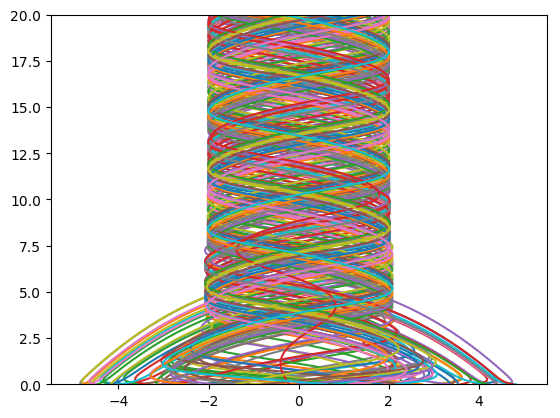

In [7]:
lista=0:0.01:20;      # Paso h=0.01
for i in 1:100
    CI3=5*(2*rand(1)-1)
    CI4=5*(2*rand(1)-1)
    vector=RK_4(P,lista,[CI3,CI4]);
    lista_x1=map(x->x[1],vector);
    lista_x2=map(x->x[2],vector);
    plot(lista_x1,lista)
    xlim([-5.5,5.5])
    ylim([-0,20])
end

En el espacio $(u(t),t)$:

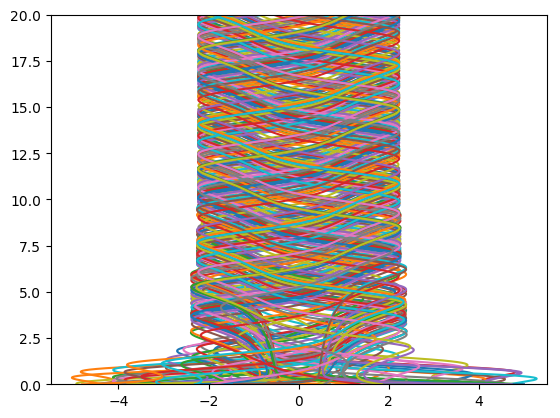

In [8]:
lista=0:0.01:20;      # Paso h=0.01
for i in 1:100
    CI3=5*(2*rand(1)-1)
    CI4=5*(2*rand(1)-1)
    vector=RK_4(P,lista,[CI3,CI4]);
    lista_x1=map(x->x[1],vector);
    lista_x2=map(x->x[2],vector);
    plot(lista_x2,lista)
    xlim([-5.5,5.5])
    ylim([-0,20])
end

<div align="right" style="text-indent:0.5cm">**Alonso Torres Edgar Giovanni**</div>